소리의 3대 요소   : 소리의 크기 , 소리의 높이 , 음색

  1)소리의 크기  : 음파에  있어서 진폭(음파의 폭의 크기)에 비례한다 .    
                  진폭의 크기가 크면 공기의 압력 변화가 커지고 폭이 적으면 공기의 압력변화가 작아진다.  
                  압력 변화(음압)는 소리의 크기가 정해진다.    
                  단위 Pa(파스칼) = 일기예보 기압정보   ->[로그치환]-> dB(데시벨) = 국제단위   
                  ex)평소 목소리 크기 50~ 60db    

  2)소리의 높이  : 주파수는 음파의 수량에 비례한다 .  파의 수  = 주파수  
                  주파수 수치가 높으면  고음, 낮을때는 저음  

                  ex01)사람의 소리의 높이는 주파수를 변화시키면서 소리의 높이 변화를 만들어 낸다 .  
                  -> 성대가 초당 몇번 진동하는 하는지에 따라서 목소리 높이가 결정된다.  

                  ex02)소리에 따라 인상과 감정을 판단-> 저음인 남성이 평소보다 목소리가 낮은경우(화가났다)  

  3)음색 : 음파의 질의 차이를 말한다 .  
          같은 음압, 같은 주파수라도  두개의 파의 형태가 다르기 때문에 사람의 음색의 차이를 구별한다.  


  [결론]
     음성의 크기는 진폭의 크기에 비례한다.  
     소리의 높이는 주파수에 비례 한다.  
     음의 음색은 파형의 형태와 관계가 있다.  
     소리의 3요소는 사람의 인상, 감정과의 관계가 있다.  

#### 음성의 특징 추출 기능
librosa.feature.rms(*, y=None, S=None, frame_length=2048, hop_length=512, center=True, pad_mode='constant')
- frame_length : rms를 찾는 구간의 너비를 나타낸다   
- hop_length : rms를 구하는 구간의 중첩값으로 지정한다.

In [1]:
import librosa
import numpy as np
import pandas as pd

filename = librosa.example('nutcracker')  # 샘플 데이터
y, sr = librosa.load(filename)
rms = librosa.feature.rms(y=y) #음압 레벨(음량)을 나타내는 것 Pa, dB로 변환작업    1Pa = 94db
#db 변환  1 . 지정된 상수값으로 음량을 나타내는 db
dB  = 2e-5 # 1Pa = 94db 상수값
#db 변환
x= 20*np.log10(rms /dB)   #음량을 나타내는 dB

# 2. 오디오 파일에 대한 평균 볼륨을 계산
y= np.average(x)
y  #66.56407[dB]

66.56407

In [2]:
#exam01) 주어진 음악의 샘플을 통해서 볼륨을 구해보자.
# 데이터로드  샘플링 추출 load -> 특징추출   feature.rms -> 볼륨연산  my_dB
# 오디오 파일  -> 데시벨 볼륨을 구한다.  -> 소리의 강도

# frame_length: 각 프레임에서 사용될 샘플의 수  -> 주파수 해상도를 높이지만 시간의 해상도는 낮춘다.
# hop_length: 연속적인 프레임의 간격  ->  값이 작을 수록 더 많은 프레임이 생성되고 시간 해상도를 높이는 대신
#               계산이 복잡도는 증가시킨다.


def my_dB(rms ):  # RMS -> db 변환하는 함수
    a = 2e-5
    x= 20 * np.log10(rms /a)  #소리의 강도를 로그스케일로 만들어서 확인
    dB= np.average(x)
    return dB

filename = librosa.example('nutcracker')  # 샘플 데이터
y, sr = librosa.load(filename)

rms =  librosa.feature.rms(y=y , frame_length=2048 , hop_length = 512)
print('frame_length=2048 , hop_length = 512 볼륨은 =' , my_dB(rms ),'[db]' )

rms =  librosa.feature.rms(y=y , frame_length=2048 , hop_length = 1024)
print('frame_length=2048 , hop_length = 1024 볼륨은 =' , my_dB(rms ),'[db]' )

rms =  librosa.feature.rms(y=y , frame_length=4096 , hop_length = 1024)
print('frame_length=4096 , hop_length = 1024 볼륨은 =' , my_dB(rms ),'[db]' )

frame_length=2048 , hop_length = 512 볼륨은 = 66.56407 [db]
frame_length=2048 , hop_length = 1024 볼륨은 = 66.5513 [db]
frame_length=4096 , hop_length = 1024 볼륨은 = 66.833145 [db]


#### 음계를 활용해보자 
1).  pyin(y, *, fmin, fmax[, sr, frame_length, ...])
 Fundamental frequency (F0) estimation using probabilistic YIN (pYIN).   

2).  yin(y, *, fmin, fmax[, sr, frame_length, ...])   
Fundamental frequency (F0) estimation using the YIN algorithm.

fmin, fmax는 산출하는 값을 제한하기 위한 변수로 음계의 기호로 나타내고 있다.  
C2~C7  -> 도레미파솔라시도 -> C,D,E,F,G,A,B 기호  

 EX)  C2는 피아노 아래에서 두번째로 낮은 음의 주파수를 나타낸다  
    C7은 피아노 위에서 두번째로 높은 음의 주파수를 나타낸다.  

In [3]:
#exam02) 주어진 음악의 샘플을 통해서 음계를 구해보자.

filename = librosa.example('nutcracker')
y, sr = librosa.load(filename)
F0 = librosa.yin(y, fmin= librosa.note_to_hz('C2') , fmax =librosa.note_to_hz('C7'))
print(librosa.note_to_hz('C2') ,librosa.note_to_hz('C7')  )  #65Hz  , 2093 Hz

df_f0 = pd.Series(F0)
df_f0 = df_f0.dropna(how='all')
print(df_f0.describe())
#nutcracker 의 평균 소리의 높이는  약 158Hz를 리턴한다.

65.40639132514966 2093.004522404789
count    5163.000000
mean      158.762032
std       227.771572
min        65.236686
25%        82.541770
50%        99.674670
75%       164.692571
max      2205.000000
dtype: float64


In [4]:
#exam03) # pyin 알고리즘을 이용해서 음고를 리턴받자.  librosa.note_to_hz()
#pyin  = 표준주파수 + 확률

filename = librosa.example('nutcracker')
y, sr = librosa.load(filename)

F0, voiced_flag,voiced_prob  = librosa.pyin(y, fmin= librosa.note_to_hz('C2') , fmax =librosa.note_to_hz('C7'),fill_na=None)
print(librosa.note_to_hz('C2') ,librosa.note_to_hz('C7')  )  #65Hz  , 2093 Hz

df_f0 = pd.Series(F0) #음의 높이를(F0) ,
print(df_f0)
df_f0 = df_f0.dropna(how='all')  # 모든 값의 Nan을 삭제 한다
print(df_f0.describe())  #  공통 윈도우 통계함수
#nutcracker 의 평균 소리의 음고는  약 118Hz를 리턴한다.

65.40639132514966 2093.004522404789
0       65.406391
1       65.406391
2       65.406391
3       65.406391
4       65.406391
          ...    
5158    65.406391
5159    65.406391
5160    65.406391
5161    65.406391
5162    65.406391
Length: 5163, dtype: float64
count    5163.000000
mean      118.284873
std        67.680002
min        65.406391
25%        73.841488
50%        93.034445
75%       147.682975
max       757.285265
dtype: float64


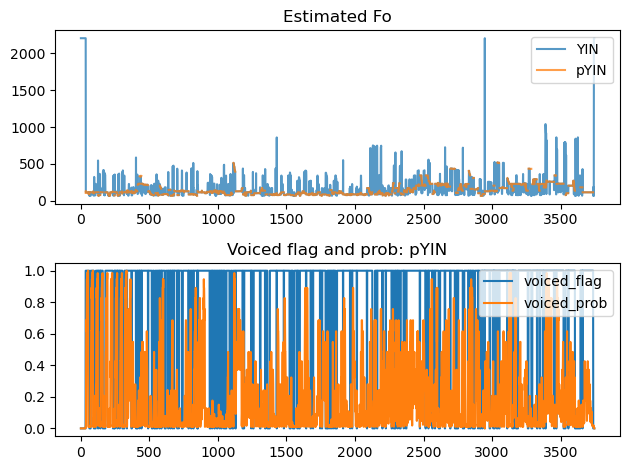

In [5]:
#exam04) #두개의 음고결과를 비교 해보자
import librosa
import matplotlib.pyplot as plt


filename = librosa.example('nutcracker')
sr = 16000
y, sr = librosa.load(filename, sr=sr, mono= True )

fmin, fmax = librosa.note_to_hz('C2'), librosa.note_to_hz('C7')

fo_yin = librosa.yin(y=y, fmin=fmin, fmax=fmax)# 기본 주파수 활용 목적
fo_pyin, voiced_flag, voiced_prob = librosa.pyin(y=y, fmin=fmin, fmax=fmax) #확률분포
#fo_pyin  : 각프레임에서 추정된 기본 주파수 -> y에 프레임에 대한 추정기본 주파수 값을 포함
#voiced_flag : 소리의 유성음= 성대의 진동 생성소리(모음[b,g,d]),
              #무성음(진동없는 생성소리[p,t,R,s,f]) , 인지 판별
#voiced_prob  : 각 프레임의 음성 확률  : 값이 높을 수록 해당프레임의  유성음일 확률이 높다.


plt.subplot ( 2 , 1 , 1 );
plt.plot (fo_yin, label = "YIN" , alpha = 0.75 );
plt.plot (fo_pyin, label = "pYIN" , alpha = 0.75 );
plt.legend(loc= 'upper right' );
plt.title( "Estimated Fo" );

plt.subplot ( 2 , 1 , 2 )
plt.plot (voiced_flag, label = "voiced_flag" );
plt.plot (voiced_prob, label = "voiced_prob" );
plt.title( "Voiced flag and prob: pYIN" );
plt.legend(loc= 'upper right' );

plt.tight_layout();
plt.show();

# 음고 비교하게 되면 같은 음고의 발화자 발생을 확인  (감성분석(30%), 감정분석(70%) )
# 두 음고가 가깝다면  소리가 하모닉하게 된다.  -> 일정하다.

##Estimated Fo
# - X축은 프레임인덱스 , Y축은 주파수
#- 파란색 바는 YIN 알고리즘을 나타낸 FO 추정값
#-  주황색 바는 pYin(확률적 YIN) 알고리즘 FO  추정값

##Voiced flag and prob: pYIN
# x축은 프레임 인덱스  / y축은  0~ 1까지 확률 값
# 파란색 바는 해당 프레임이 유성음으로 분류 될때 1의 값을 가지고 무성음일때는 0의 값을 가진다.
# 주황색 바는 해당 프레임이 유성음인 확률을 나타낸다. 이값이 높은 수록  프레임이 유성음일 가능성이 높다


[질문] 환자의 호흡 소리를 분석하여 질병을 진단하거나 건강 상태를 평가할 때 어떻게 하나요?  
=> 폐관련 진단 모니터링 = 음향,디지털 신호처리 , 기계학습 , 음성인식 기술
- 음향 분석 : 스펙트럼 분석_쌕쌕 거리는 주파수확인 , 시간 - 주파수 분석(STFT)_호흡소리
- 기계학습 : 특징추출 분류 , 딥러닝
- 음성 인식기술 , 음향신호처리


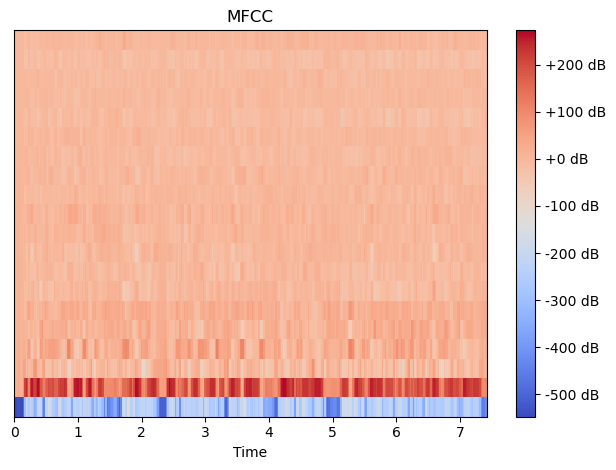

In [7]:
# MFCC 추출
import librosa
import IPython
import matplotlib.pyplot as plt

y, sr = librosa.load(librosa.ex('libri1'))
mfccs = librosa.feature.mfcc(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)
#hop_length = 1024 : MFCC 벡터의 샘플 수
# htk=True : htk 소프트웨어와 호환되는 방식으로 MFCC를 계산할지 유무

plt.figure()
#plt.subplot(3,1,1)
librosa.display.specshow(mfccs,x_axis='time',sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()